<a href="https://colab.research.google.com/github/SoumyadityaDutta-rgb/RETAINX-Churn-Prediction/blob/main/RETAINX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xgboost

**IMPORTS**

In [ ]:
pip install catboost


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')

###**DATA CLEANING**

In [ ]:
data = pd.read_excel("churn.xlsx")
display(data.head())


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
display(data.describe())

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
print("Missing values before handling:")
print(data.isnull().sum())


Missing values before handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
data.shape


(7043, 21)

In [ ]:
"""The **TotalCharges** column is currently
stored as an object (string) rather than a numeric value,
so it needs to be converted to a numeric type before performing any calculations or analysis."""


data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print("\nMissing values after converting TotalCharges:")
print(data.isnull().sum())


Missing values after converting TotalCharges:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
data.dropna(inplace=True)
print("\nMissing values after dropping rows:")
print(data.isnull().sum())


Missing values after dropping rows:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
data.shape

(7032, 21)

###***VISULIZATION***

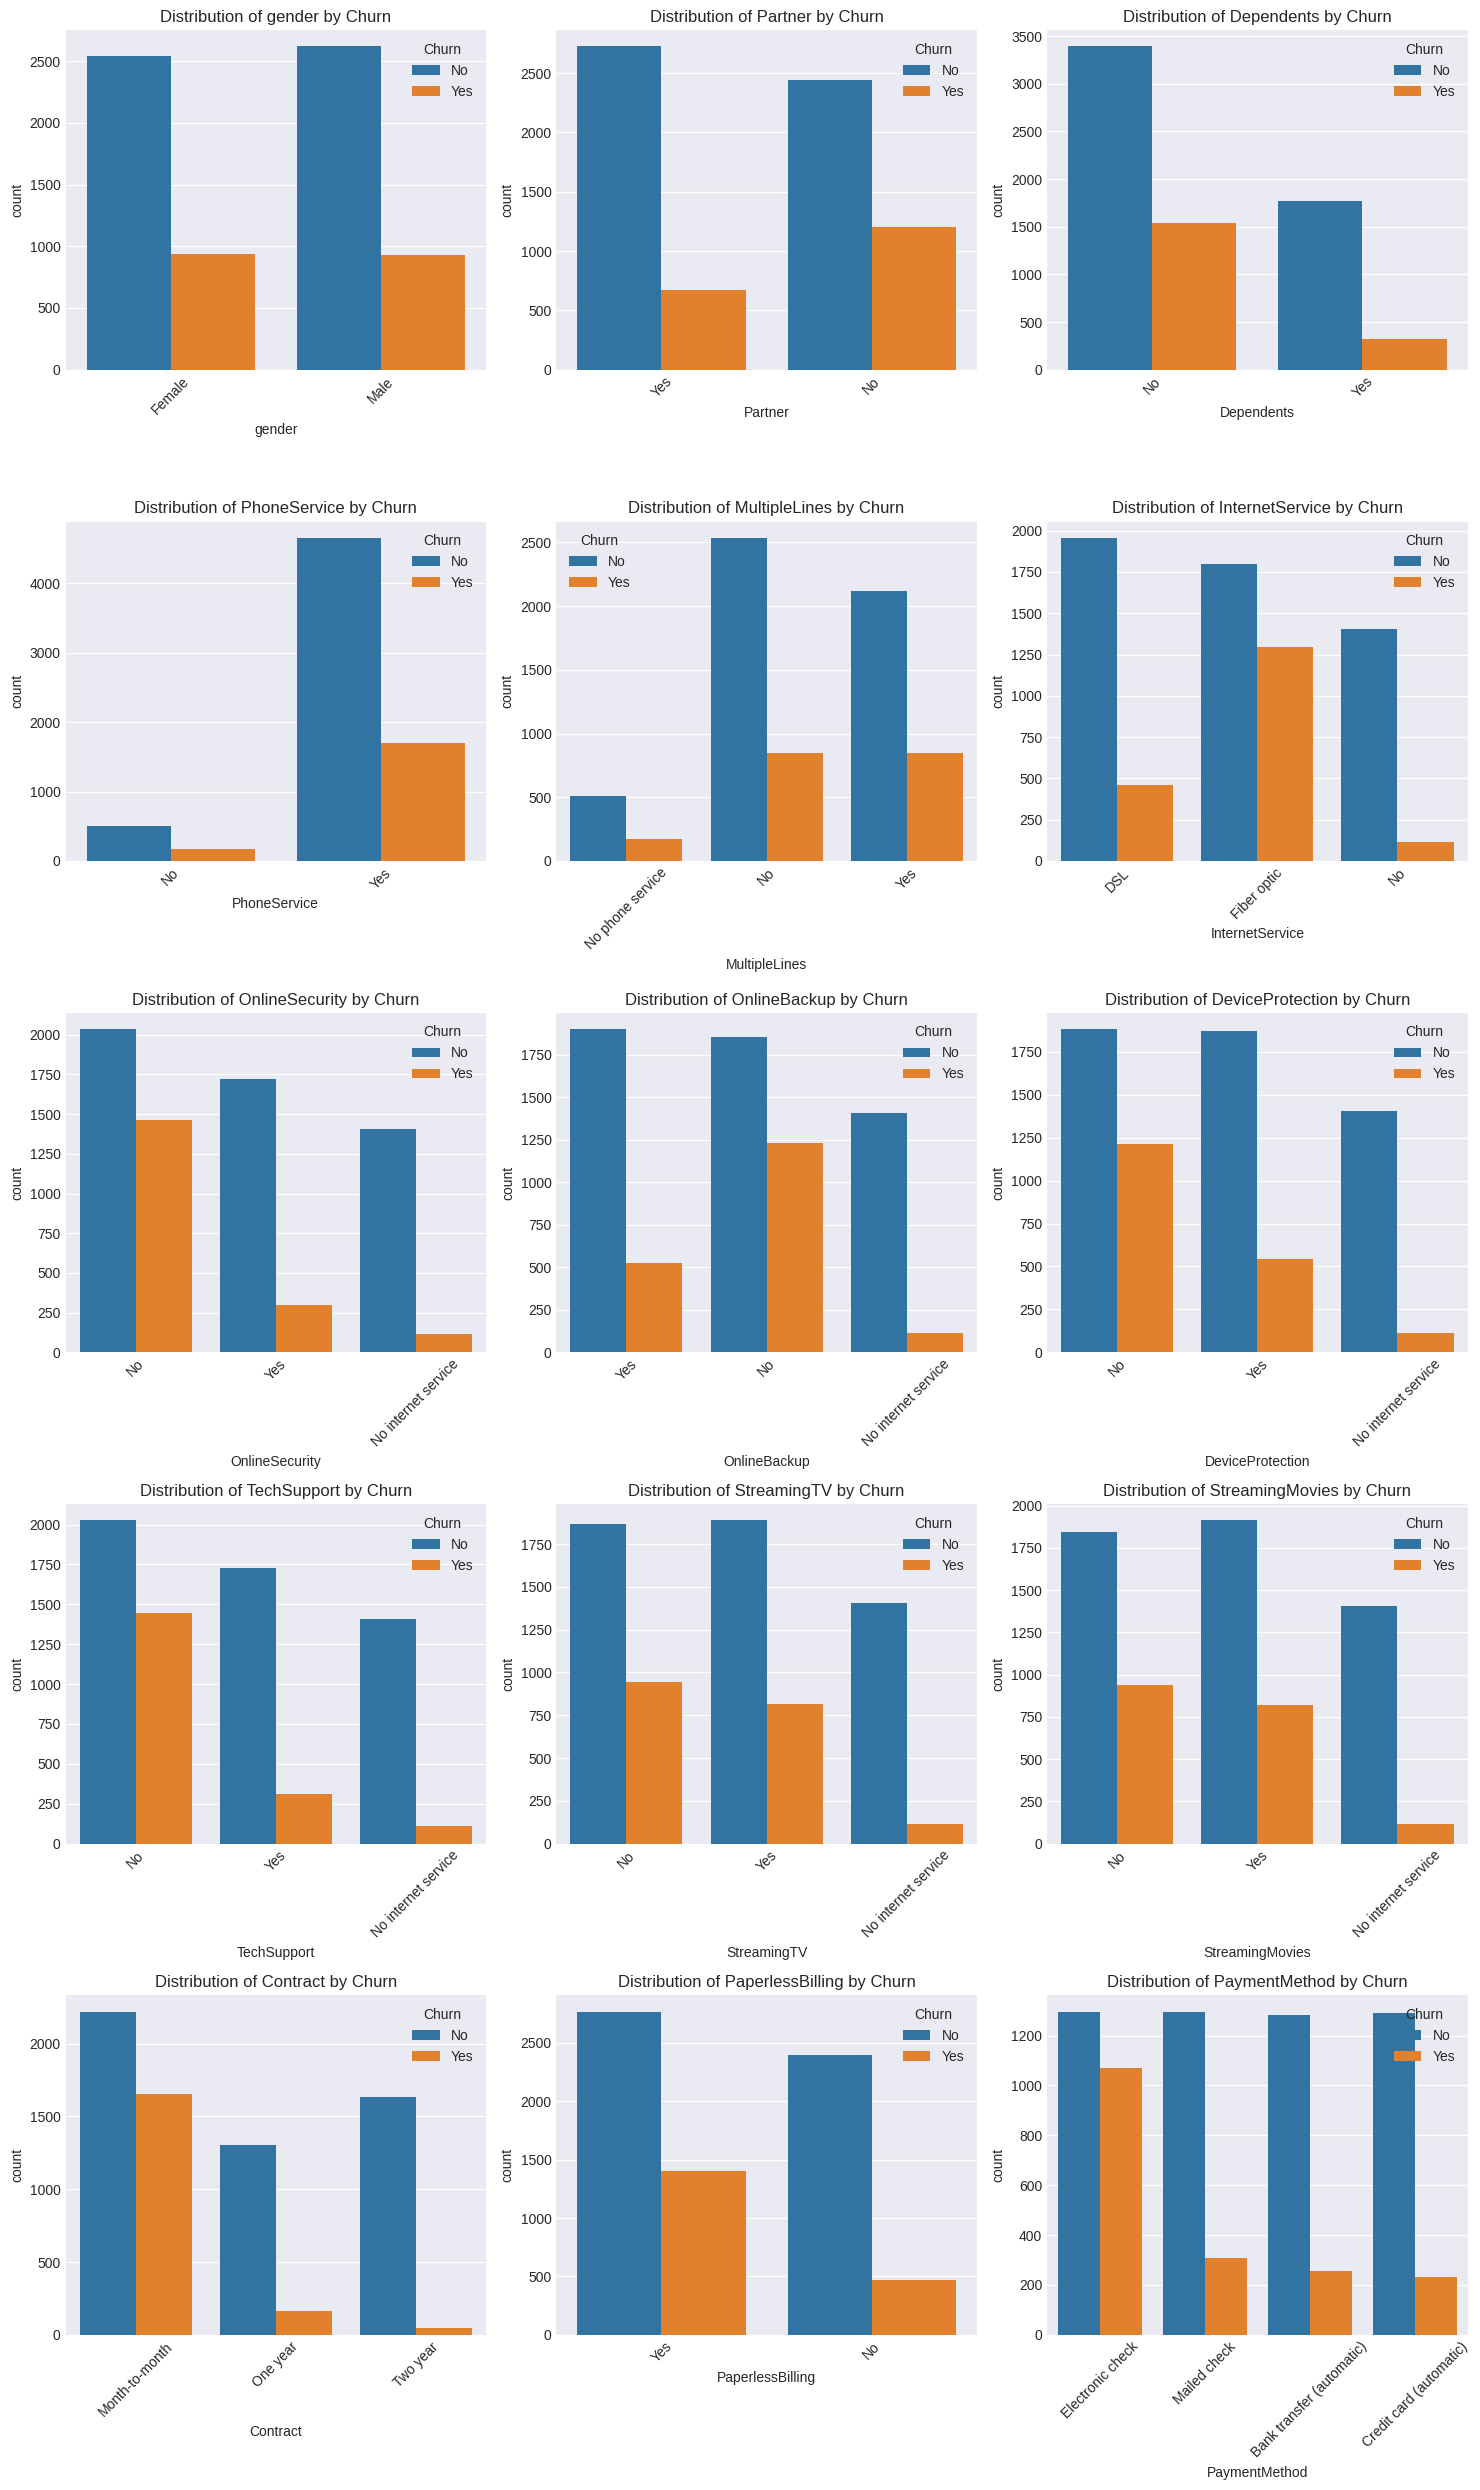

In [ ]:
categorical_cols=data.select_dtypes(include="object").columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

n_cols=3
n_rows=(len(categorical_cols)+n_cols-1)//n_cols

fig,axes= plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes=axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data,x=col,hue="Churn",ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn')
plt.tight_layout()
plt.show()


<Axes: xlabel='Churn', ylabel='count'>

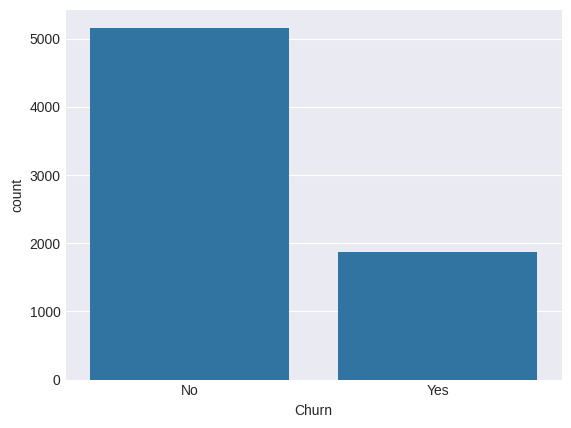

In [ ]:
 sns.countplot(data=data,x="Churn")


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn_numeric
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,1.000000,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,0.015683,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.219874,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.102411,-0.199484
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,1.000000,0.150541
Churn_numeric,0.150541,-0.354049,0.192858,-0.199484,0.150541,1.000000


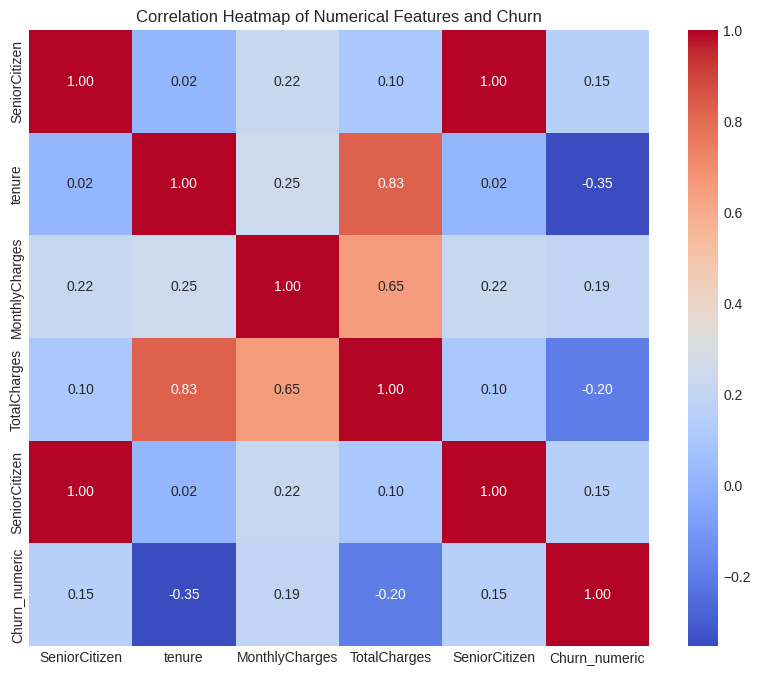

In [ ]:
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']
print(numerical_cols)

# Convert 'Churn' column to numerical (0 for 'No', 1 for 'Yes')
data['Churn_numeric'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only numerical columns and the new 'Churn_numeric' column
numerical_data = data[numerical_cols + ['Churn_numeric']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
display(correlation_matrix)

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features and Churn')
plt.show()

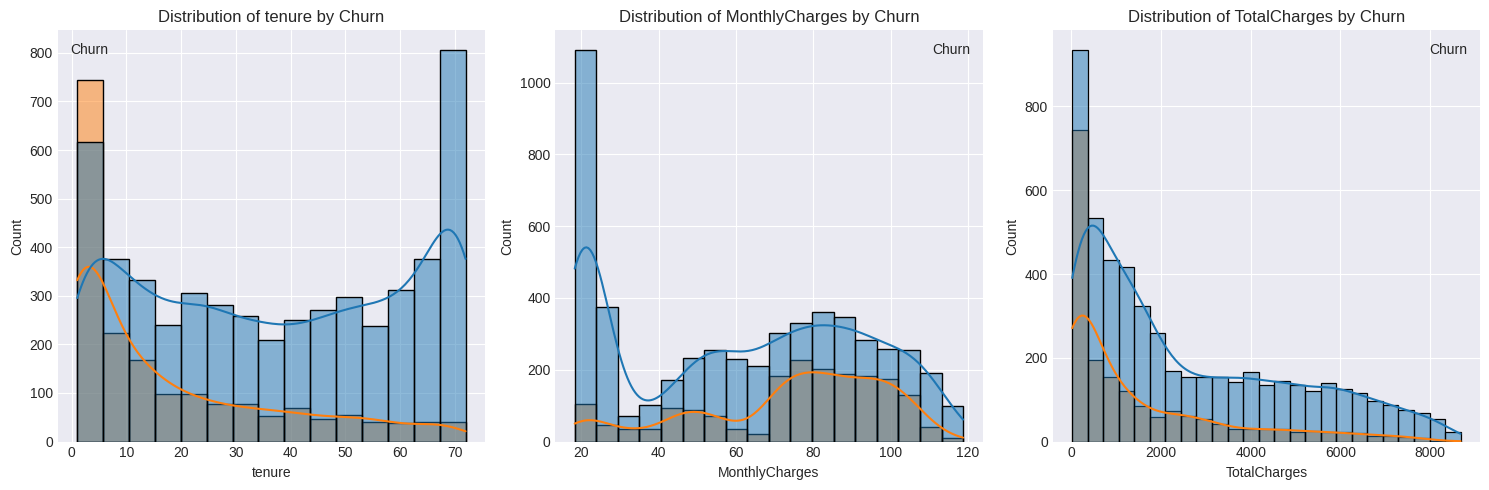

In [ ]:
n_cols = 3
n_rows = (len(['tenure', 'MonthlyCharges', 'TotalCharges']) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    sns.histplot(data=data, x=col, hue='Churn', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].legend(title='Churn')


plt.tight_layout()
plt.show()

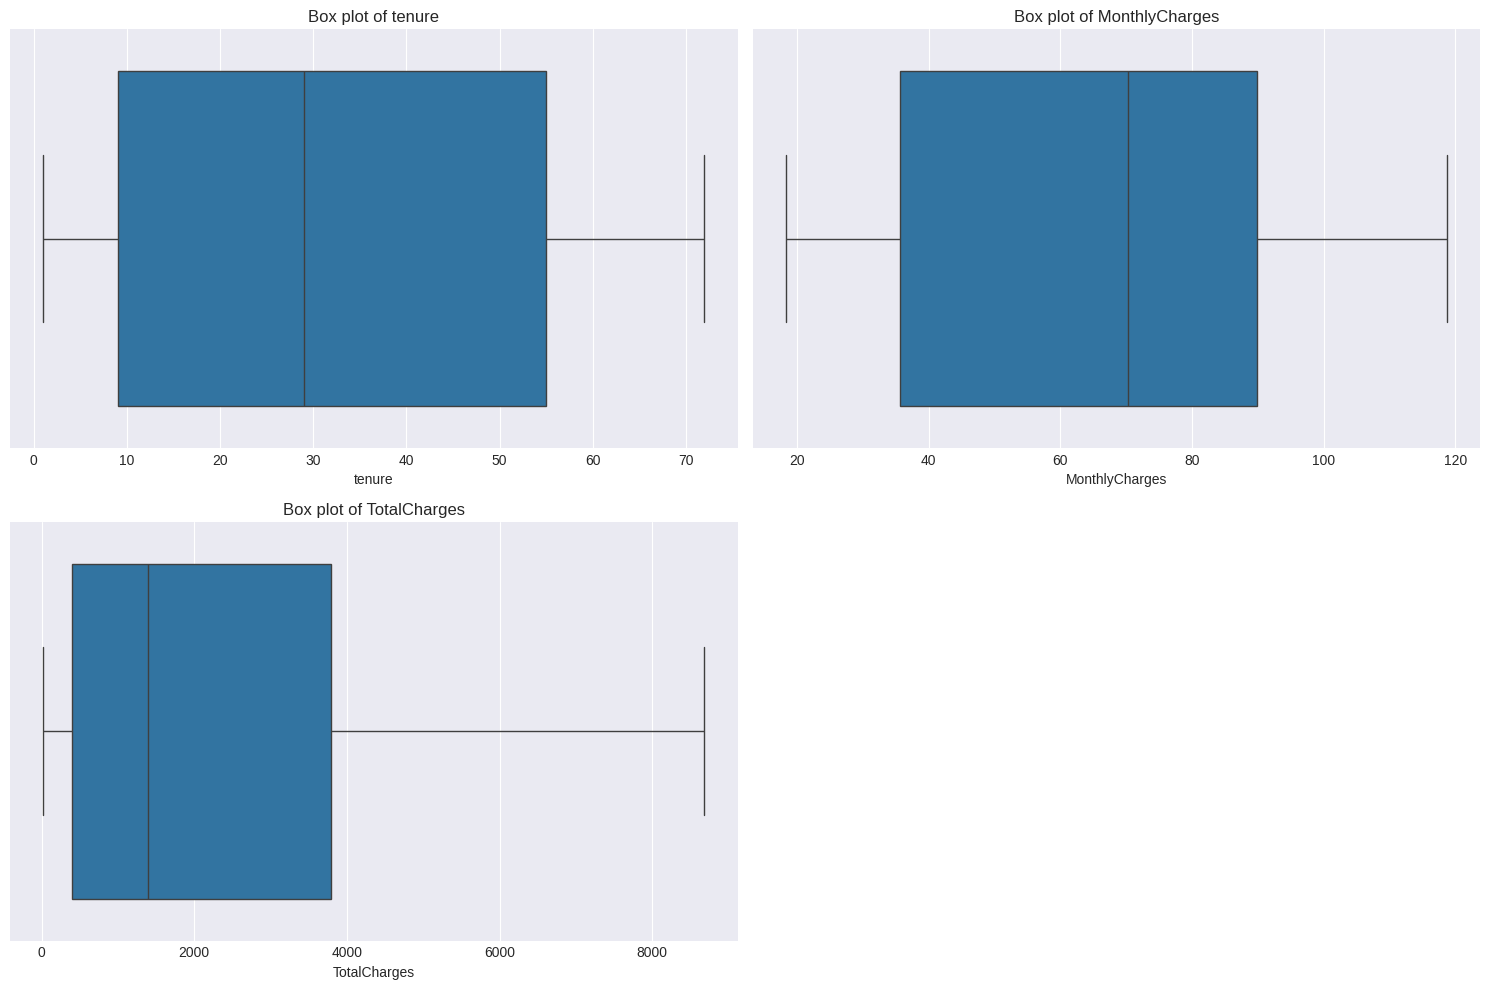

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
"""Based on these box plots, there don't seem to be any extreme outliers that would necessarily require removal"""

"Based on these box plots, there don't seem to be any extreme outliers that would necessarily require removal"

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Separate numeric and categorical columns
# Define target and ID columns
ID_COL = 'customerID'
TARGET = 'Churn_numeric'

# Define numerical columns (to scale) - SeniorCitizen will be handled as numerical
NUMERICAL_FEATURES = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Define categorical columns (to OneHotEncode)
CATEGORICAL_FEATURES = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod'
]

# OneHotEncode categorical + scale numerical
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), NUMERICAL_FEATURES),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), CATEGORICAL_FEATURES)
])

In [ ]:
# Define features (X) and target (y)
# Features (X) will include all columns that the preprocessor will handle
all_feature_columns = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
X = data[all_feature_columns]

# Target (y)
y = data['Churn_numeric']

# Apply the preprocessor (defined in PBHAEkXGI-Z_)
# This will return a numpy array
X_processed_array = preprocessor.fit_transform(X)

# Get feature names after preprocessing for the new DataFrame and user input matching
numerical_feature_names = NUMERICAL_FEATURES
categorical_feature_names_out = preprocessor.named_transformers_['cat'].get_feature_names_out(CATEGORICAL_FEATURES)
processed_feature_names = numerical_feature_names + list(categorical_feature_names_out)

# Convert X_processed (numpy array) to DataFrame with correct column names
X_processed_df = pd.DataFrame(X_processed_array, columns=processed_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size = 0.30, random_state = 40, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test)

# Store the fitted preprocessor for later use with new data
fitted_preprocessor = preprocessor

X_train shape: (4922, 45)
X_test shape: (2110, 45)
y_train shape: (4922,)
y_test shape: 5710    0
2513    0
1078    0
5711    1
6574    0
       ..
2115    0
1290    0
2095    1
2139    0
6041    0
Name: Churn_numeric, Length: 2110, dtype: int64


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_numeric'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, ExtraTreesClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import time

def extended_grid_search(X_train, y_train, X_test, y_test):
    models_params = {
        'LogisticRegression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('clf', LogisticRegression(max_iter=1000))
            ]),
            'params': {'clf__C': [0.01, 0.1, 1, 10],
                       'clf__solver': ['lbfgs', 'liblinear']}
        },
        'SVM': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('clf', SVC())
            ]),
            'params': {'clf__C': [0.1, 1, 10],
                       'clf__kernel': ['linear', 'rbf'],
                       'clf__gamma': ['scale', 'auto']}
        },
        'KNeighbors': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('clf', KNeighborsClassifier())
            ]),
            'params': {'clf__n_neighbors': [3, 5, 7],
                       'clf__weights': ['uniform', 'distance']}
        },
        'DecisionTree': {
            'model': DecisionTreeClassifier(),
            'params': {'max_depth': [None, 5, 10],
                       'min_samples_split': [2, 5, 10]}
        },
        'RandomForest': {
            'model': RandomForestClassifier(),
            'params': {'n_estimators': [100, 200],
                       'max_depth': [None, 5, 10]}
        },
        'ExtraTrees': {
            'model': ExtraTreesClassifier(),
            'params': {'n_estimators': [100, 200],
                       'max_depth': [None, 5, 10]}
        },
        'GradientBoosting': {
            'model': GradientBoostingClassifier(),
            'params': {'n_estimators': [100, 200],
                       'learning_rate': [0.05, 0.1],
                       'max_depth': [3, 5]}
        },
        'AdaBoost': {
            'model': AdaBoostClassifier(),
            'params': {'n_estimators': [50, 100, 200],
                       'learning_rate': [0.05, 0.1, 1.0]}
        },
        'NaiveBayes': {
            'model': GaussianNB(),
            'params': {}
        },
        'LDA': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('clf', LinearDiscriminantAnalysis())
            ]),
            'params': {}
        },
        'QDA': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('clf', QuadraticDiscriminantAnalysis())
            ]),
            'params': {}
        },
        'XGBoost': {
    'model': xgb.XGBClassifier(
        use_label_encoder=False, eval_metric='logloss',
        random_state=42, scale_pos_weight=1.5
    ),
    'params': {
        'n_estimators': [200, 400],
        'max_depth': [4, 6, 8],
        'learning_rate': [0.03, 0.05, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
},
        'LightGBM': {
    'model': lgb.LGBMClassifier(verbose=-1, is_unbalance=True, random_state=42),
    'params': {
        'n_estimators': [200, 400],
        'learning_rate': [0.03, 0.05, 0.1],
        'max_depth': [5, 10],
        'num_leaves': [31, 63]
    }
},
        'CatBoost': {
        'model': CatBoostClassifier(verbose=0, random_state=42, scale_pos_weight=1.5),
        'params': {
        'iterations': [200, 400, 600],
        'depth': [4, 6, 8],
        'learning_rate': [0.03, 0.05, 0.1],
        'l2_leaf_reg': [3, 5, 7]
    }
}
    }

    results = []
    best_models = {}
    total_models = len(models_params)

    for i, (name, mp) in enumerate(models_params.items(), 1):
        print(f"[{i}/{total_models}] Training {name}...")
        start = time.time()

        gs = GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1)
        gs.fit(X_train, y_train)
        y_pred = gs.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        duration = time.time() - start

        print(f"[{i}/{total_models}] {name} finished in {duration:.2f}s — Accuracy: {acc:.4f}")

        results.append({
            'Model': name,
            'Accuracy': acc,
            'Best Params': gs.best_params_,
            'Train Time (s)': round(duration, 2)
        })

        best_models[name] = {
            'best_model': gs.best_estimator_,
            'test_accuracy': acc,
            'y_pred': y_pred
        }

    results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

    best_name = results_df.iloc[0]['Model']
    best_info = best_models[best_name]

    print(f"\nBest Model: {best_name}")
    print(f"Accuracy: {best_info['test_accuracy']:.4f}")
    print(f"Best Params: {results_df.iloc[0]['Best Params']}")

    return best_name, best_info['best_model'], best_info['test_accuracy'], best_info['y_pred']

In [ ]:
best_name, best_model, best_acc ,best_y_pred= extended_grid_search(X_train, y_train, X_test, y_test)

print(f"Best Model: {best_name}")
print(f"Accuracy: {best_acc:.4f}")

[1/14] Training LogisticRegression...
[1/14] LogisticRegression finished in 1.07s — Accuracy: 0.8123
[2/14] Training SVM...
[2/14] SVM finished in 45.69s — Accuracy: 0.8019
[3/14] Training KNeighbors...
[3/14] KNeighbors finished in 0.92s — Accuracy: 0.7739
[4/14] Training DecisionTree...
[4/14] DecisionTree finished in 0.85s — Accuracy: 0.7882
[5/14] Training RandomForest...
[5/14] RandomForest finished in 13.05s — Accuracy: 0.8024
[6/14] Training ExtraTrees...
[6/14] ExtraTrees finished in 11.55s — Accuracy: 0.7957
[7/14] Training GradientBoosting...
[7/14] GradientBoosting finished in 52.15s — Accuracy: 0.8071
[8/14] Training AdaBoost...
[8/14] AdaBoost finished in 19.25s — Accuracy: 0.8076
[9/14] Training NaiveBayes...
[9/14] NaiveBayes finished in 0.15s — Accuracy: 0.7019
[10/14] Training LDA...
[10/14] LDA finished in 0.21s — Accuracy: 0.8057
[11/14] Training QDA...
[11/14] QDA finished in 0.13s — Accuracy: 0.7531
[12/14] Training XGBoost...
[12/14] XGBoost finished in 94.52s — A

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report


F1 Score for LogisticRegression: 0.6214

Confusion Matrix:
[[1389  160]
 [ 236  325]]


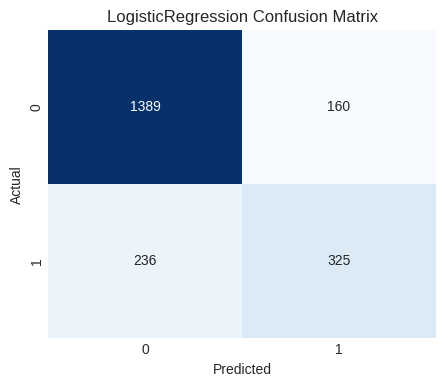


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1549
           1       0.67      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.81      0.81      0.81      2110



In [ ]:
f1 = f1_score(y_test, best_y_pred)
print(f"F1 Score for {best_name}: {f1:.4f}\n")


cm = confusion_matrix(y_test, best_y_pred)
print("Confusion Matrix:")
print(cm)

# رسم Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"{best_name} Confusion Matrix")
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_test, best_y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, classification_report

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ROC-AUC: 0.858
F1 Score: 0.621

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1549
           1       0.67      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.81      0.81      0.81      2110



In [ ]:
best_acc


0.8123222748815165

In [ ]:
data.to_csv(r"churn.csv", index=False)


In [ ]:
import pandas as pd
import numpy as np

# We need NUMERICAL_FEATURES and CATEGORICAL_FEATURES lists (defined in PBHAEkXGI-Z_)
# And fitted_preprocessor (defined in KDLw89JfJGe-)

def preprocess_user_input_for_prediction(raw_input_dict, fitted_preprocessor, numerical_feature_names, categorical_feature_names):
    # Convert input to DataFrame
    input_df = pd.DataFrame([raw_input_dict])

    # Ensure all expected feature columns are present in the input_df, filling with default if missing
    # This is important for the preprocessor.transform() to work correctly and handle unseen categories
    for col in numerical_feature_names + categorical_feature_names:
        if col not in input_df.columns:
            if col in numerical_feature_names:
                input_df[col] = 0.0 # Numerical default
            else:
                input_df[col] = 'No' # Categorical default, assuming 'No' is a common default or a valid category for 'handle_unknown'

    # Reorder columns to match the order expected by the preprocessor
    # The order for the ColumnTransformer is numerical_feature_names followed by categorical_feature_names
    input_df_ordered = input_df[numerical_feature_names + categorical_feature_names]

    # Apply the fitted preprocessor
    preprocessed_array = fitted_preprocessor.transform(input_df_ordered)

    # Get feature names after preprocessing from the fitted preprocessor
    processed_numerical_names = numerical_feature_names
    processed_categorical_names = fitted_preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_feature_names)
    all_processed_feature_names = processed_numerical_names + list(processed_categorical_names)

    preprocessed_df = pd.DataFrame(preprocessed_array, columns=all_processed_feature_names)

    return preprocessed_df

# ======== USER INPUT SECTION =========
print("\n🧍 Enter customer details for churn prediction 👇\n")

user_input = {}
user_input['gender'] = input("Gender (Male/Female): ")
user_input['SeniorCitizen'] = int(input("SeniorCitizen (0 = No, 1 = Yes): "))
user_input['Partner'] = input("Partner (Yes/No): ")
user_input['Dependents'] = input("Dependents (Yes/No): ")
user_input['tenure'] = int(input("Tenure (months): "))
user_input['PhoneService'] = input("PhoneService (Yes/No): ")
user_input['MultipleLines'] = input("MultipleLines (Yes/No/No phone service): ")
user_input['InternetService'] = input("InternetService (DSL/Fiber optic/No): ")
user_input['OnlineSecurity'] = input("OnlineSecurity (Yes/No/No internet service): ")
user_input['OnlineBackup'] = input("OnlineBackup (Yes/No/No internet service): ")
user_input['DeviceProtection'] = input("DeviceProtection (Yes/No/No internet service): ")
user_input['TechSupport'] = input("TechSupport (Yes/No/No internet service): ")
user_input['StreamingTV'] = input("StreamingTV (Yes/No/No internet service): ")
user_input['StreamingMovies'] = input("StreamingMovies (Yes/No/No internet service): ")
user_input['Contract'] = input("Contract (Month-to-month/One year/Two year): ")
user_input['PaperlessBilling'] = input("PaperlessBilling (Yes/No): ")
user_input['PaymentMethod'] = input("PaymentMethod (Electronic check/Mailed check/Bank transfer/Credit card): ")
user_input['MonthlyCharges'] = float(input("MonthlyCharges (e.g. 75.35): "))
user_input['TotalCharges'] = float(input("TotalCharges (e.g. 3000.50): "))

# Preprocess the user input using the defined function
# Use the fitted_preprocessor, NUMERICAL_FEATURES, and CATEGORICAL_FEATURES
preprocessed_input_df = preprocess_user_input_for_prediction(
    user_input, fitted_preprocessor, NUMERICAL_FEATURES, CATEGORICAL_FEATURES
)

# ======== USE YOUR TRAINED MODEL (best_model) =========
churn_prob = best_model.predict_proba(preprocessed_input_df)[:, 1][0]
churn_pred = "Yes" if churn_prob >= 0.5 else "No"

# ======== SHOW RESULT =========
print("\n🔮 Prediction Results:")
print(f"Churn Prediction: {churn_pred}")
print(f"Churn Probability: {churn_prob * 100:.2f}%")


🧍 Enter customer details for churn prediction 👇

Gender (Male/Female): Male
SeniorCitizen (0 = No, 1 = Yes): 0
Partner (Yes/No): Yes
Dependents (Yes/No): No
Tenure (months): 8
PhoneService (Yes/No): Yes
MultipleLines (Yes/No/No phone service): Yes
InternetService (DSL/Fiber optic/No): No
OnlineSecurity (Yes/No/No internet service): Yes
OnlineBackup (Yes/No/No internet service): No
DeviceProtection (Yes/No/No internet service): Yes
TechSupport (Yes/No/No internet service): No
StreamingTV (Yes/No/No internet service): Yes
StreamingMovies (Yes/No/No internet service): No
Contract (Month-to-month/One year/Two year): Month-to-Month
PaperlessBilling (Yes/No): Yes
PaymentMethod (Electronic check/Mailed check/Bank transfer/Credit card): Credit card
MonthlyCharges (e.g. 75.35): 67
TotalCharges (e.g. 3000.50): 5999

🔮 Prediction Results:
Churn Prediction: Yes
Churn Probability: 72.51%


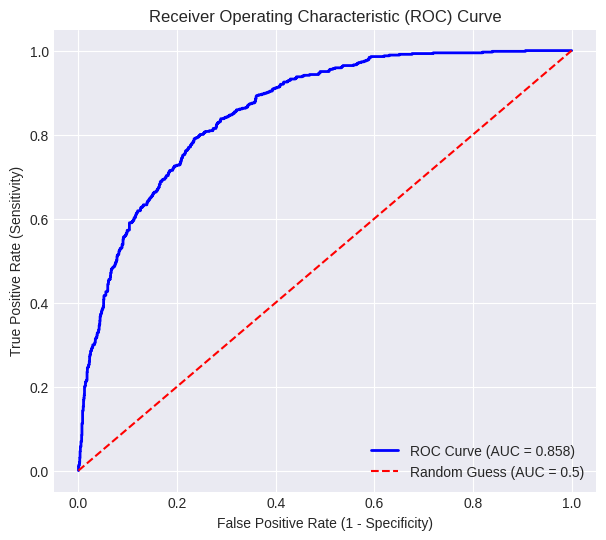

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get churn probabilities for test data
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


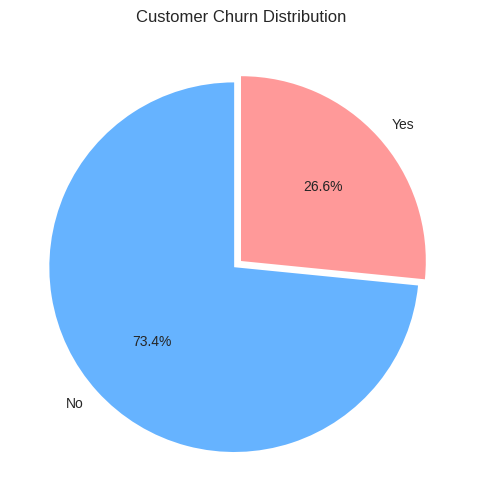

In [ ]:
import matplotlib.pyplot as plt

# Pie chart for Churn distribution
churn_counts = data['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values
colors = ['#66b3ff', '#ff9999']  # blue for 'No', red for 'Yes'

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0))
plt.title('Customer Churn Distribution')
plt.show()


In [ ]:
import plotly.express as px
fig = px.pie(data, names='Contract', title='Contract Type Distribution',
             color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_traces(textinfo='percent+label')
fig.show()


In [ ]:
import joblib

# Save model
joblib.dump(best_model, "churn_model.pkl")

# If you have a preprocessor
# joblib.dump(preprocessor, "preprocessor.pkl")


['churn_model.pkl']

🔍 Generating SHAP explanations for the best model...
TreeExplainer failed, switching to generic Explainer: Model type not yet supported by TreeExplainer: <class 'sklearn.pipeline.Pipeline'>


PermutationExplainer explainer: 2111it [00:39, 42.35it/s]                          



✅ Top Feature Importance (SHAP Values)


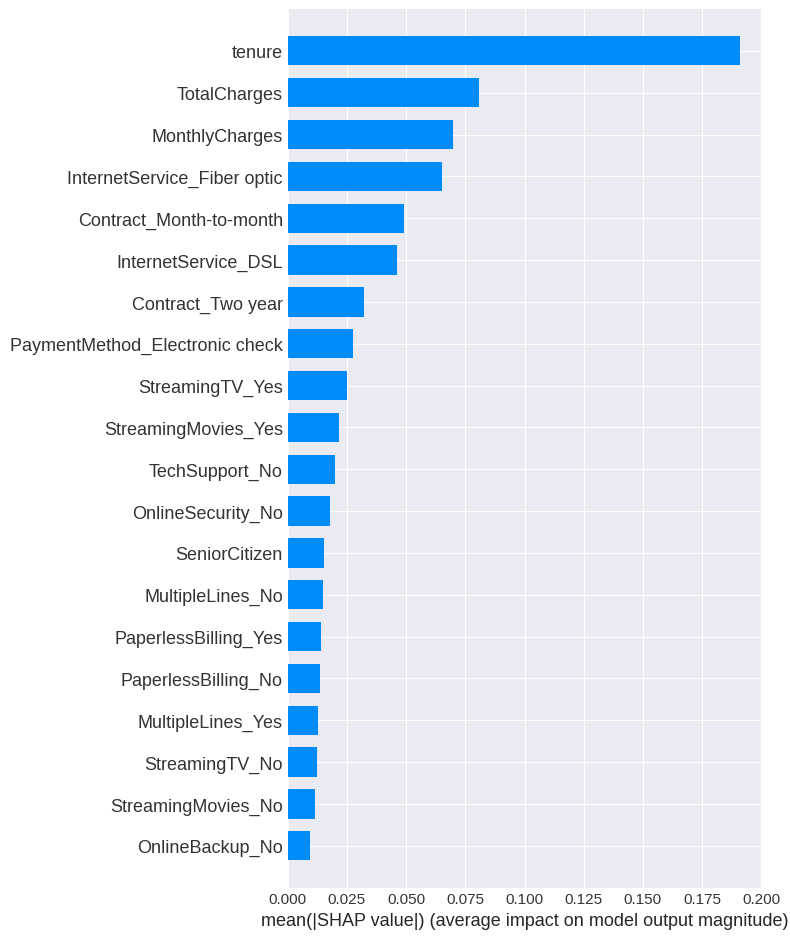

<Figure size 640x480 with 0 Axes>


💡 Feature Impact on Churn Prediction


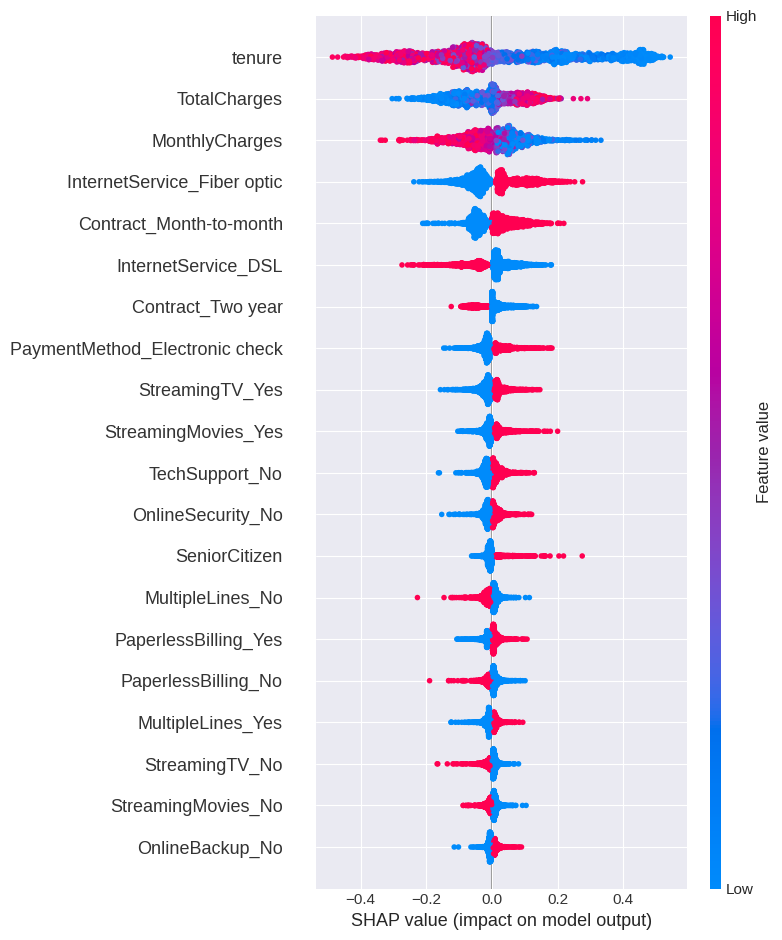

<Figure size 640x480 with 0 Axes>


🔬 Example: Explain one customer's churn prediction
Example customer data:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3469,-0.440327,-1.239504,-1.47914,-0.99329,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Waterfall plot not available for this model type: 'PermutationExplainer' object has no attribute 'expected_value'

✅ SHAP explanations show which features most strongly drive churn predictions.


In [ ]:
# ===== SHAP INTERPRETABILITY BLOCK =====
!pip install shap --quiet

import shap
import matplotlib.pyplot as plt

# Initialize SHAP environment
shap.initjs()

print("🔍 Generating SHAP explanations for the best model...")

# ---- Step 1: Create SHAP Explainer ----
try:
    # Tree-based models (CatBoost, XGBoost, LightGBM, GradientBoosting)
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)
except Exception as e:
    print("TreeExplainer failed, switching to generic Explainer:", e)
    explainer = shap.Explainer(best_model.predict, X_train)
    shap_values = explainer(X_test)

# ---- Step 2: Global Feature Importance (Bar Plot) ----
print("\n✅ Top Feature Importance (SHAP Values)")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)
plt.tight_layout()
plt.show()

# ---- Step 3: SHAP Summary Plot (Detailed Feature Impact) ----
print("\n💡 Feature Impact on Churn Prediction")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, show=True)
plt.tight_layout()
plt.show()

# ---- Step 4: Explain a Single Example ----
print("\n🔬 Example: Explain one customer's churn prediction")

# Pick a random sample
sample_idx = 5
sample = X_test.iloc[[sample_idx]]

print("Example customer data:")
display(sample)

# Generate single explanation
try:
    shap_values_single = explainer.shap_values(sample)
    shap.waterfall_plot(shap.Explanation(values=shap_values_single[0],
                                         base_values=explainer.expected_value,
                                         data=sample.iloc[0]))
except Exception as e:
    print("Waterfall plot not available for this model type:", e)

plt.show()

print("\n✅ SHAP explanations show which features most strongly drive churn predictions.")
